In [95]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import *
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression,Lasso,Ridge,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

import webbrowser
from sklearn.preprocessing import LabelEncoder


import warnings
warnings.filterwarnings('ignore')


In [96]:
df= pd.read_csv('M20_P8_Space_Dataset.csv')
df

objid          ra        dec         u         g         r  \
0     1.237650e+18  183.531326   0.089693  19.47406  17.04240  15.94699   
1     1.237650e+18  183.598371   0.135285  18.66280  17.21449  16.67637   
2     1.237650e+18  183.680207   0.126185  19.38298  18.19169  17.47428   
3     1.237650e+18  183.870529   0.049911  17.76536  16.60272  16.16116   
4     1.237650e+18  183.883288   0.102557  17.55025  16.26342  16.43869   
...            ...         ...        ...       ...       ...       ...   
9995  1.237650e+18  131.316413  51.539547  18.81777  17.47053  16.91508   
9996  1.237650e+18  131.306083  51.671341  18.27255  17.43849  17.07692   
9997  1.237650e+18  131.552562  51.666986  18.75818  17.77784  17.51872   
9998  1.237650e+18  131.477151  51.753068  18.88287  17.91068  17.53152   
9999  1.237650e+18  131.665012  51.805307  19.27586  17.37829  16.30542   

             i         z   run  rerun  camcol  field     specobjid   class  \
0     15.50342  15.22531   752    301       4    267  3.722360e+18    STAR   
1     16.48922  16.39150   752    301       4    267  3.638140e+17    STAR   
2     17.08732  16.80125   752    301       4    268  3.232740e+17  GALAXY   
3     15.98233  15.90438   752    301       4    269  3.722370e+18    STAR   
4     16.55492  16.61326   752    301       4    269  3.722370e+18    STAR   
...        ...       ...   ...    ...     ...    ...           ...     ...   
9995  16.68305  16.50570  1345    301       3    161  5.033450e+17  GALAXY   
9996  16.71661  16.69897  1345    301       3    162  5.033400e+17  GALAXY   
9997  17.43302  17.42048  1345    301       3    162  8.222620e+18    STAR   
9998  17.36284  17.13988  1345    301       3    163  5.033400e+17  GALAXY   
9999  15.83548  15.50588  1345    301       3    163  5.033410e+17  GALAXY   

      redshift  plate    mjd  fiberid  
0    -0.000009   3306  54922      491  
1    -0.000055    323  51615      541  
2     0.123111    287  52023      513  
3    -0.000111   3306  54922      510  
4     0.000590   3306  54922      512  
...        ...    ...    ...      ...  
9995  0.027583    447  51877      246  
9996  0.117772    447  51877      228  
9997 -0.000402   7303  57013      622  
9998  0.014019    447  51877      229  
9999  0.118417    447  51877      233  

[10000 rows x 18 columns]

In [97]:
df.isnull()

objid     ra    dec      u      g      r      i      z    run  rerun  \
0     False  False  False  False  False  False  False  False  False  False   
1     False  False  False  False  False  False  False  False  False  False   
2     False  False  False  False  False  False  False  False  False  False   
3     False  False  False  False  False  False  False  False  False  False   
4     False  False  False  False  False  False  False  False  False  False   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
9995  False  False  False  False  False  False  False  False  False  False   
9996  False  False  False  False  False  False  False  False  False  False   
9997  False  False  False  False  False  False  False  False  False  False   
9998  False  False  False  False  False  False  False  False  False  False   
9999  False  False  False  False  False  False  False  False  False  False   

      camcol  field  specobjid  class  redshift  plate    mjd  fiberid  
0      False  False      False  False     False  False  False    False  
1      False  False      False  False     False  False  False    False  
2      False  False      False  False     False  False  False    False  
3      False  False      False  False     False  False  False    False  
4      False  False      False  False     False  False  False    False  
...      ...    ...        ...    ...       ...    ...    ...      ...  
9995   False  False      False  False     False  False  False    False  
9996   False  False      False  False     False  False  False    False  
9997   False  False      False  False     False  False  False    False  
9998   False  False      False  False     False  False  False    False  
9999   False  False      False  False     False  False  False    False  

[10000 rows x 18 columns]

In [98]:
df.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

There Are No Null value in given dataset

In [99]:
data_Info= 'https://en.wikipedia.org/wiki/Right_ascension'

In [100]:
webbrowser.open(data_Info)

True

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [102]:
df.describe()

objid            ra           dec             u             g  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000  10000.000000   
mean   1.237650e+18    175.529987     14.836148     18.619355     17.371931   
std    1.577039e+05     47.783439     25.212207      0.828656      0.945457   
min    1.237650e+18      8.235100     -5.382632     12.988970     12.799550   
25%    1.237650e+18    157.370946     -0.539035     18.178035     16.815100   
50%    1.237650e+18    180.394514      0.404166     18.853095     17.495135   
75%    1.237650e+18    201.547279     35.649397     19.259232     18.010145   
max    1.237650e+18    260.884382     68.542265     19.599900     19.918970   

                  r             i             z           run    rerun  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.0   
mean      16.840963     16.583579     16.422833    981.034800    301.0   
std        1.067764      1.141805      1.203188    273.305024      0.0   
min       12.431600     11.947210     11.610410    308.000000    301.0   
25%       16.173333     15.853705     15.618285    752.000000    301.0   
50%       16.858770     16.554985     16.389945    756.000000    301.0   
75%       17.512675     17.258550     17.141447   1331.000000    301.0   
max       24.802040     28.179630     22.833060   1412.000000    301.0   

             camcol         field     specobjid      redshift         plate  \
count  10000.000000  10000.000000  1.000000e+04  10000.000000  10000.000000   
mean       3.648700    302.380100  1.645022e+18      0.143726   1460.986400   
std        1.666183    162.577763  2.013998e+18      0.388774   1788.778371   
min        1.000000     11.000000  2.995780e+17     -0.004136    266.000000   
25%        2.000000    184.000000  3.389248e+17      0.000081    301.000000   
50%        4.000000    299.000000  4.966580e+17      0.042591    441.000000   
75%        5.000000    414.000000  2.881300e+18      0.092579   2559.000000   
max        6.000000    768.000000  9.468830e+18      5.353854   8410.000000   

                mjd       fiberid  
count  10000.000000  10000.000000  
mean   52943.533300    353.069400  
std     1511.150651    206.298149  
min    51578.000000      1.000000  
25%    51900.000000    186.750000  
50%    51997.000000    351.000000  
75%    54468.000000    510.000000  
max    57481.000000   1000.000000

Here we can see numeric description which show us correlation among all columns also we can see positive and negative correlation which give us idea which attribute is more suitable for our model and data

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [104]:
df.rename(columns={'class':'Classification'}, inplace=True)

df['Classification'].unique()

array(['STAR', 'GALAXY', 'QSO'], dtype=object)

we just change name of column for better and clear understanding 

In [105]:
label=LabelEncoder()
for i in df.columns:
    df[i]=label.fit_transform(df[i])

we use label encoder for producing bettter result with numerical value

In [106]:
df

objid    ra   dec     u     g     r     i     z  run  rerun  camcol  \
0         0  5378  4030  8818  3143  1853  1594  1474    3      0       3   
1         0  5392  4145  4066  3722  4220  4703  4956    3      0       3   
2         0  5405  4118  8203  8155  7210  6793  6350    3      0       3   
3         0  5458  3910  1569  1960  2431  2897  3415    3      0       3   
4         0  5462  4064  1206  1255  3347  4943  5701    3      0       3   
...     ...   ...   ...   ...   ...   ...   ...   ...  ...    ...     ...   
9995      0  1300  8185  4765  4816  5129  5367  5339   16      0       2   
9996      0  1299  8198  2765  4665  5707  5488  6007   16      0       2   
9997      0  1316  8196  4467  6285  7400  7927  8097   16      0       2   
9998      0  1311  8204  5071  6921  7442  7735  7408   16      0       2   
9999      0  1321  8208  7452  4390  2905  2415  2164   16      0       2   

      field  specobjid  Classification  redshift  plate  mjd  fiberid  
0       256       5641               2      1681    267  182      490  
1       256       2267               2      1437     49    6      540  
2       257       1289               0      8222     21   80      512  
3       258       5642               2      1162    267  182      509  
4       258       5642               2      3501    267  182      511  
...     ...        ...             ...       ...    ...  ...      ...  
9995    150       3999               0      4124    111   37      245  
9996    151       3997               0      8089    111   37      227  
9997    151       6240               2       379    459  341      621  
9998    152       3997               0      3881    111   37      228  
9999    152       3998               0      8106    111   37      232  

[10000 rows x 18 columns]

In [107]:
df.Classification.value_counts()

0    4998
2    4152
1     850
Name: Classification, dtype: int64

In [108]:
Z_pivot = \
df.pivot_table(index="Classification", values="z", aggfunc=np.median)

In [109]:
Z_pivot

z
Classification        
0               3933.0
1               9298.5
2               5490.5

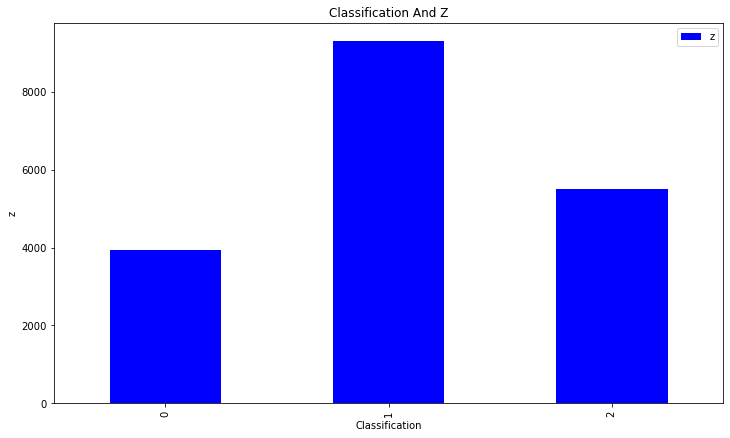

In [110]:
Z_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel('Classification')
plt.ylabel('z')
plt.title('Classification And Z')
plt.xticks(rotation=90)
plt.show()

In above figure we are seeing Pivote Table of Classification Here we can Easily see that count of 1=QSO is maximum followedd by 2=Star and 0=Galaxy With Respect to "Z"

In [111]:
U_pivot = \
df.pivot_table(index="Classification", values="u", aggfunc=np.median)

In [112]:
G_pivot = \
df.pivot_table(index="Classification", values="g", aggfunc=np.median)

In [113]:
R_pivot = \
df.pivot_table(index="Classification", values="r", aggfunc=np.median)

In [114]:
I_pivot = \
df.pivot_table(index="Classification", values="i", aggfunc=np.median)

In [115]:
Dev_Exp= [U_pivot,G_pivot,R_pivot,I_pivot,Z_pivot]

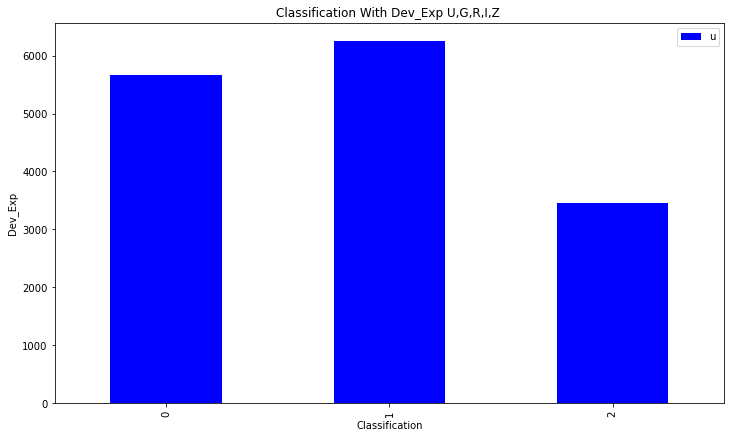

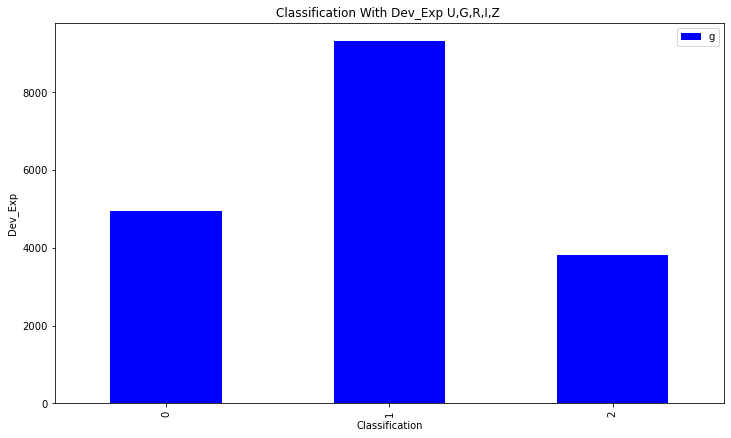

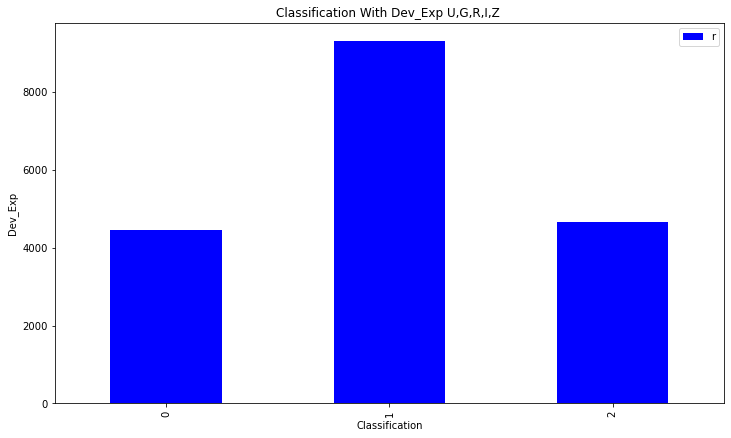

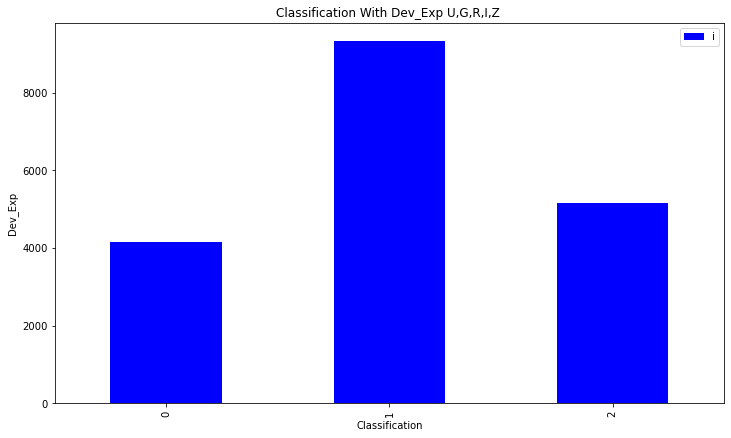

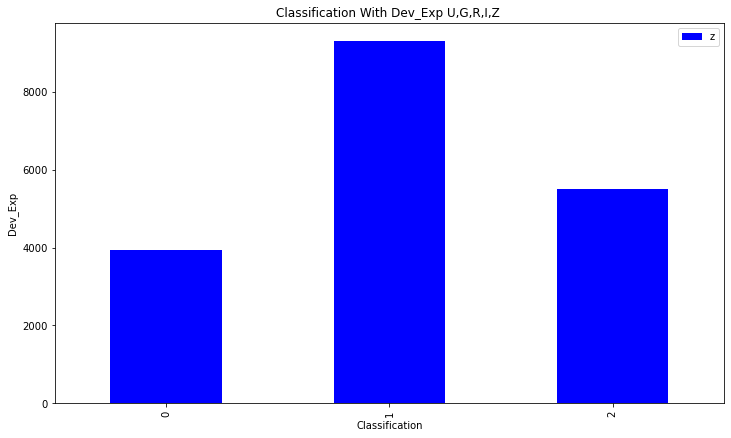

In [116]:
for i in Dev_Exp:
    i.plot(kind='bar', color='blue',figsize=(12,7))
    plt.xlabel('Classification')
    plt.ylabel('Dev_Exp')
    plt.title('Classification With Dev_Exp U,G,R,I,Z ')
    plt.xticks(rotation=90)
    plt.show()

In above figure we are seeing Pivote Table of Classification Here we can Easily see that count of 1=QSO, 2=Star and 0=Galaxy With Respect to U,G,R,I,Z which are represent the response of the 5 bands of the telescope.

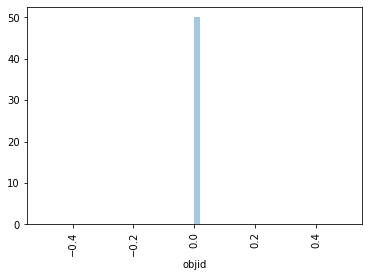

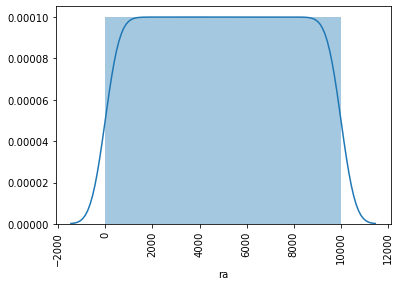

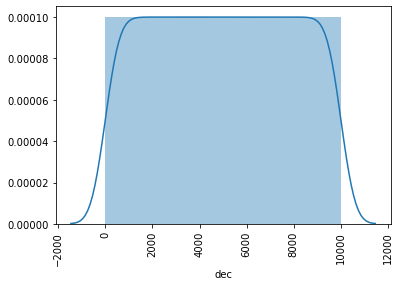

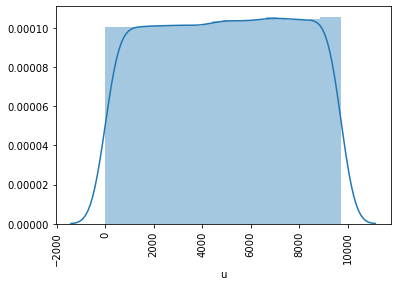

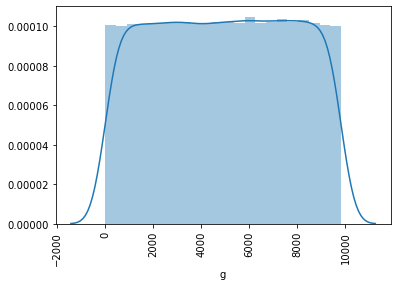

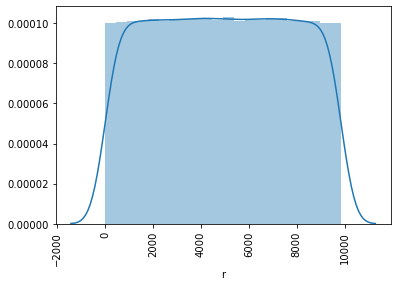

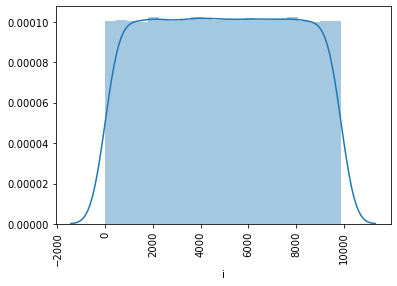

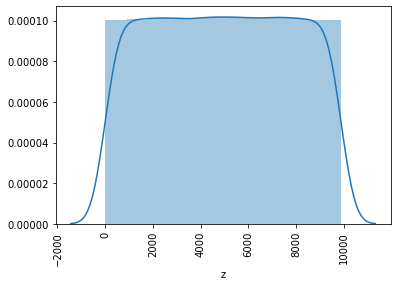

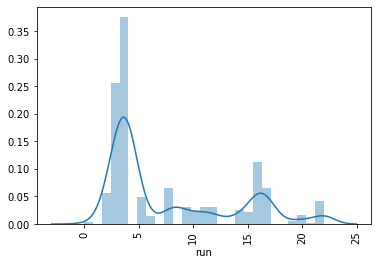

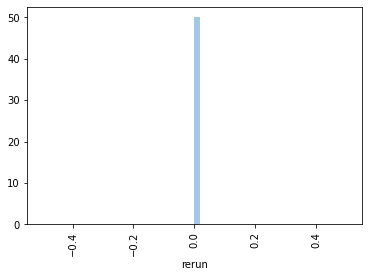

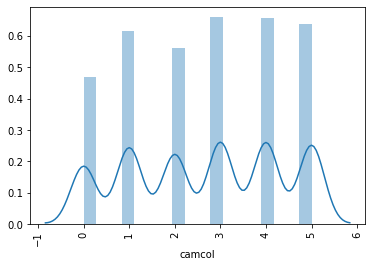

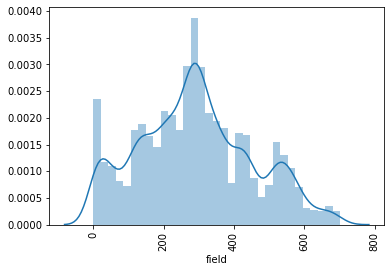

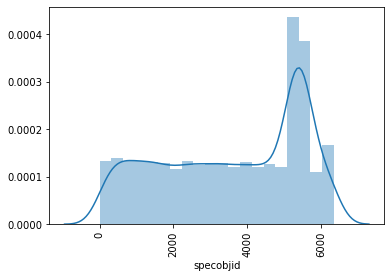

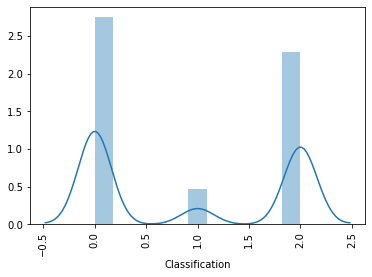

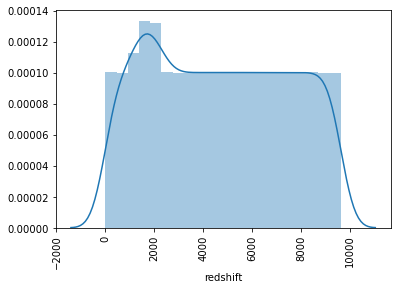

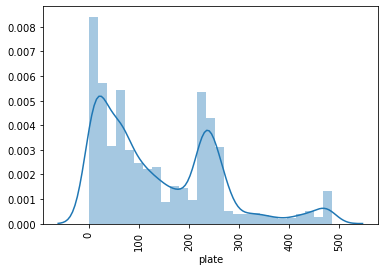

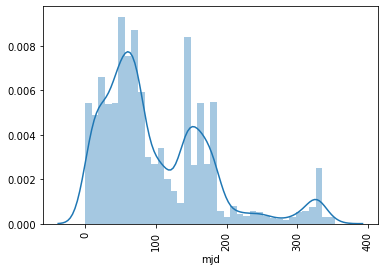

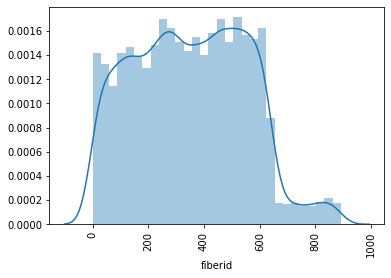

In [117]:
for i in df.describe().columns:
    sns.distplot(df[i])
    plt.xticks(rotation=90)
    plt.show()

we again create visual represantation for each attributes we can see if there are skewness present in attributes

In [118]:
df.skew()

objid             0.000000
ra                0.000000
dec               0.000000
u                -0.021847
g                -0.006730
r                 0.000088
i                 0.000009
z                -0.000981
run               0.978221
rerun             0.000000
camcol           -0.100220
field             0.229204
specobjid        -0.323754
Classification    0.169292
redshift          0.068622
plate             0.888700
mjd               1.177842
fiberid           0.150256
dtype: float64

In [119]:
for col in df.columns:
    if df[col].skew()>0.55:
        df[col]=np.log1p(df[col])

In [120]:
df.skew()

objid             0.000000
ra                0.000000
dec               0.000000
u                -0.021847
g                -0.006730
r                 0.000088
i                 0.000009
z                -0.000981
run               0.448988
rerun             0.000000
camcol           -0.100220
field             0.229204
specobjid        -0.323754
Classification    0.169292
redshift          0.068622
plate            -0.852625
mjd              -0.994669
fiberid           0.150256
dtype: float64

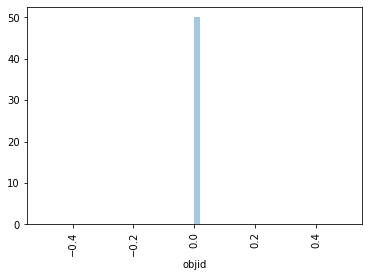

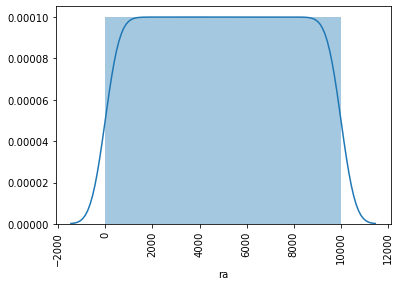

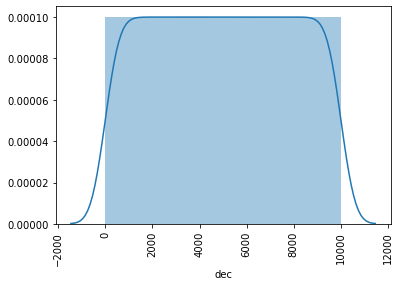

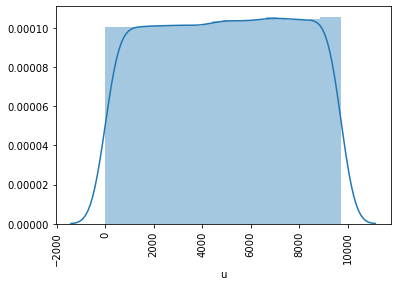

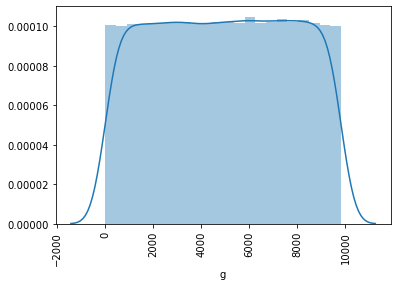

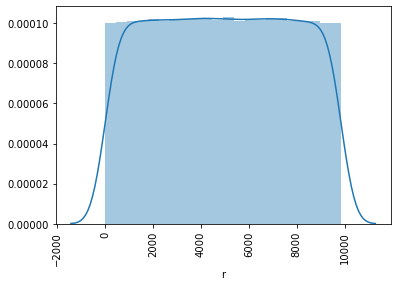

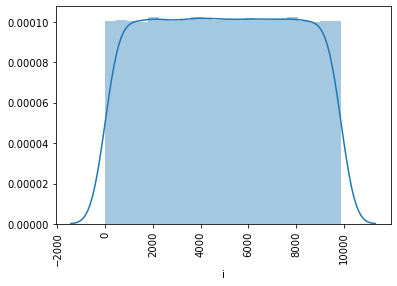

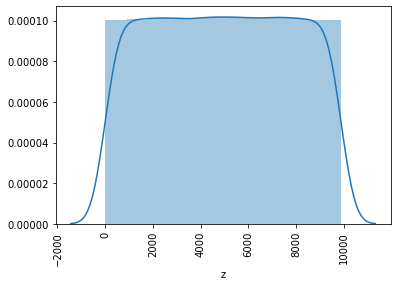

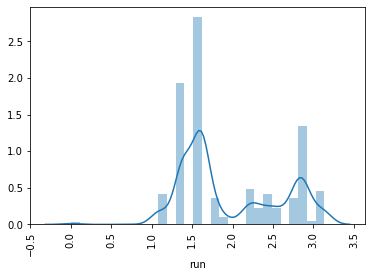

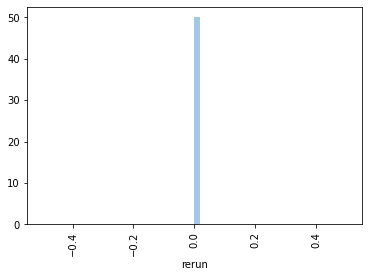

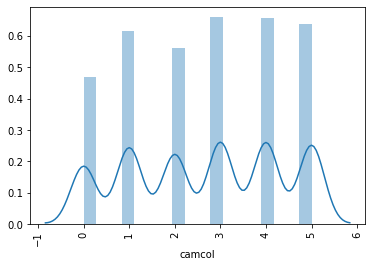

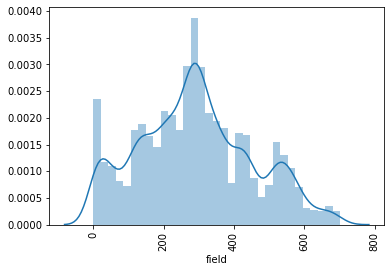

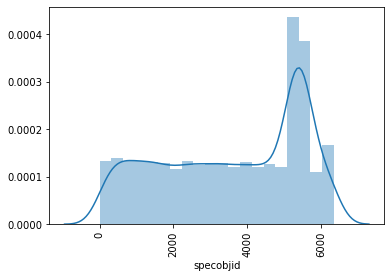

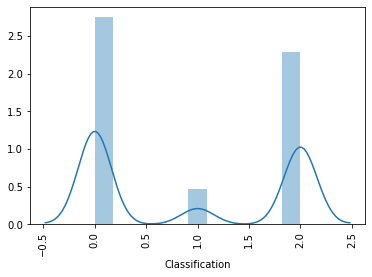

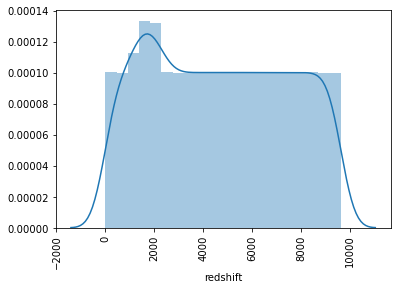

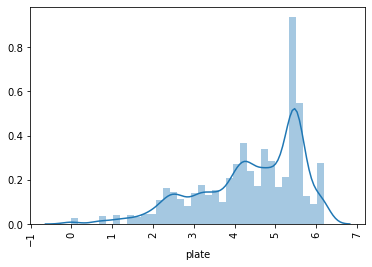

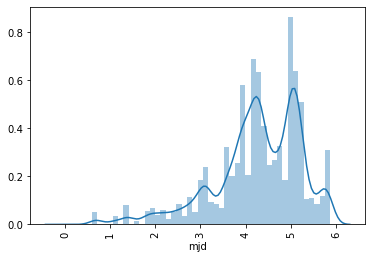

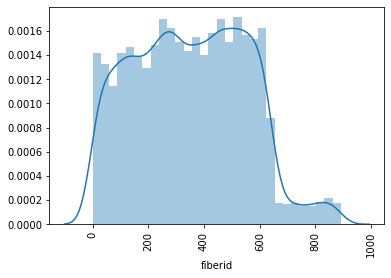

In [121]:
for i in df.describe().columns:
    sns.distplot(df[i])
    plt.xticks(rotation=90)
    plt.show()

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

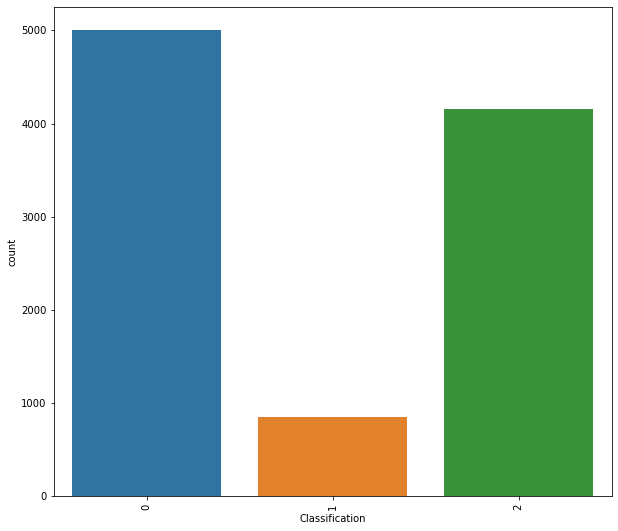

In [122]:
plt.figure(figsize=(10,9))
sns.countplot(df.Classification)
plt.xticks(rotation=90)

In above figure we are seeing Total Count of Classification Here we can Easily see that count of 0=Galaxy is maximum followedd by 2=Star and 1=QSO

In [123]:
df

objid    ra   dec     u     g     r     i     z       run  rerun  \
0         0  5378  4030  8818  3143  1853  1594  1474  1.386294      0   
1         0  5392  4145  4066  3722  4220  4703  4956  1.386294      0   
2         0  5405  4118  8203  8155  7210  6793  6350  1.386294      0   
3         0  5458  3910  1569  1960  2431  2897  3415  1.386294      0   
4         0  5462  4064  1206  1255  3347  4943  5701  1.386294      0   
...     ...   ...   ...   ...   ...   ...   ...   ...       ...    ...   
9995      0  1300  8185  4765  4816  5129  5367  5339  2.833213      0   
9996      0  1299  8198  2765  4665  5707  5488  6007  2.833213      0   
9997      0  1316  8196  4467  6285  7400  7927  8097  2.833213      0   
9998      0  1311  8204  5071  6921  7442  7735  7408  2.833213      0   
9999      0  1321  8208  7452  4390  2905  2415  2164  2.833213      0   

      camcol  field  specobjid  Classification  redshift     plate       mjd  \
0          3    256       5641               2      1681  5.590987  5.209486   
1          3    256       2267               2      1437  3.912023  1.945910   
2          3    257       1289               0      8222  3.091042  4.394449   
3          3    258       5642               2      1162  5.590987  5.209486   
4          3    258       5642               2      3501  5.590987  5.209486   
...      ...    ...        ...             ...       ...       ...       ...   
9995       2    150       3999               0      4124  4.718499  3.637586   
9996       2    151       3997               0      8089  4.718499  3.637586   
9997       2    151       6240               2       379  6.131226  5.834811   
9998       2    152       3997               0      3881  4.718499  3.637586   
9999       2    152       3998               0      8106  4.718499  3.637586   

      fiberid  
0         490  
1         540  
2         512  
3         509  
4         511  
...       ...  
9995      245  
9996      227  
9997      621  
9998      228  
9999      232  

[10000 rows x 18 columns]

We can see by comparing above data that:
Star=2
Galaxy=0
and QSO(Quasar Object)=1

(array([   0,    1,    2, ..., 6346, 6347, 6348]),
 <a list of 6349 Text major ticklabel objects>)

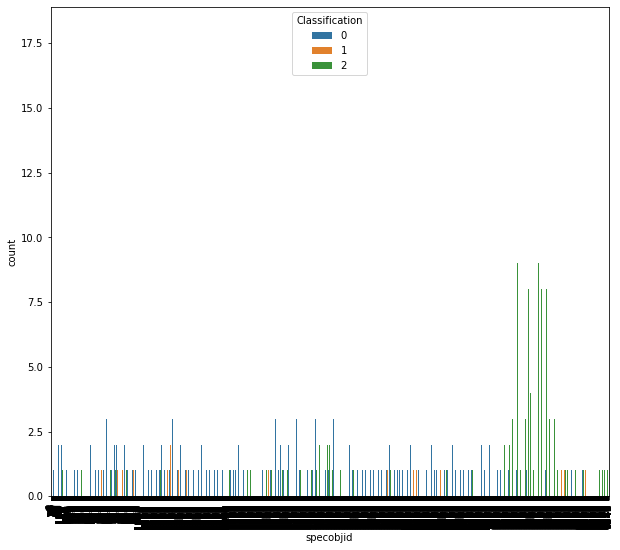

In [124]:
plt.figure(figsize=(10,9))
sns.countplot(x="specobjid",hue="Classification",data=df)
plt.xticks(rotation=90)

in above count plot we can see the Object Identifier observation with classification of 1=QSO, 2=Star and 0=Galaxy

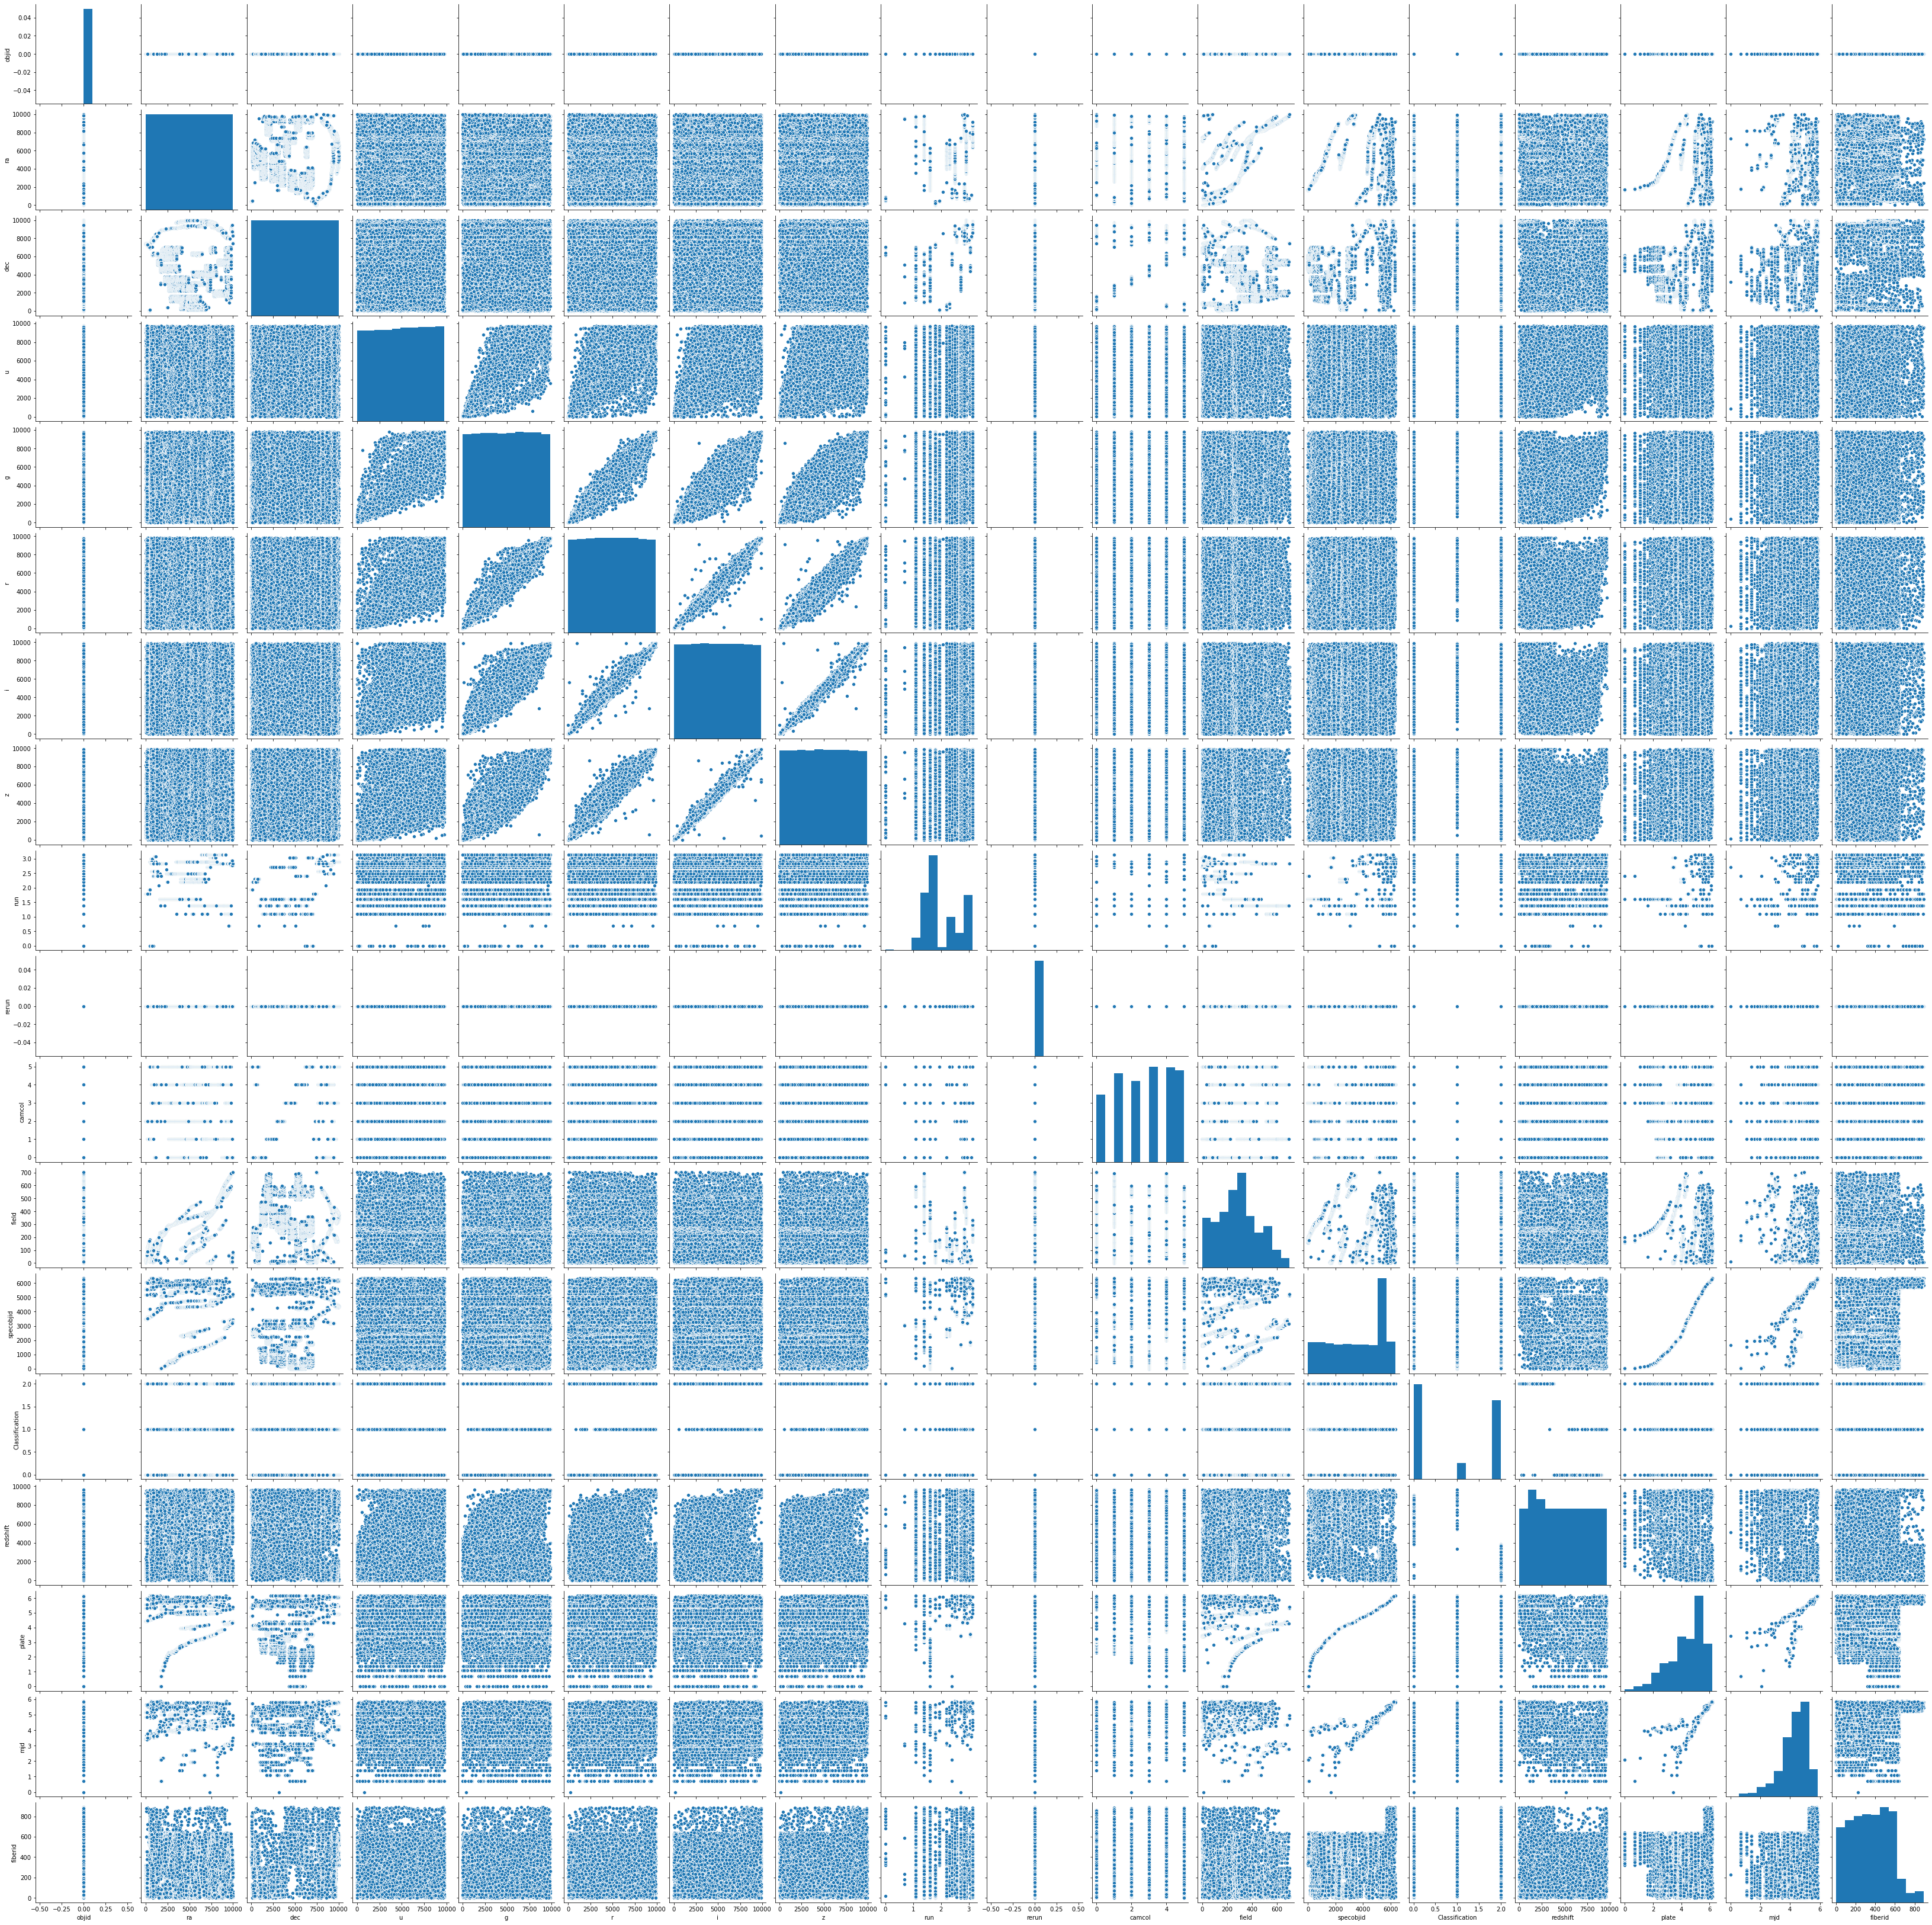

In [125]:
sns.pairplot(df)

pair plot show us visual representaion of correlation among all given attributes 

In [126]:
df.drop(['rerun'],axis=1,inplace=True)
df

objid    ra   dec     u     g     r     i     z       run  camcol  \
0         0  5378  4030  8818  3143  1853  1594  1474  1.386294       3   
1         0  5392  4145  4066  3722  4220  4703  4956  1.386294       3   
2         0  5405  4118  8203  8155  7210  6793  6350  1.386294       3   
3         0  5458  3910  1569  1960  2431  2897  3415  1.386294       3   
4         0  5462  4064  1206  1255  3347  4943  5701  1.386294       3   
...     ...   ...   ...   ...   ...   ...   ...   ...       ...     ...   
9995      0  1300  8185  4765  4816  5129  5367  5339  2.833213       2   
9996      0  1299  8198  2765  4665  5707  5488  6007  2.833213       2   
9997      0  1316  8196  4467  6285  7400  7927  8097  2.833213       2   
9998      0  1311  8204  5071  6921  7442  7735  7408  2.833213       2   
9999      0  1321  8208  7452  4390  2905  2415  2164  2.833213       2   

      field  specobjid  Classification  redshift     plate       mjd  fiberid  
0       256       5641               2      1681  5.590987  5.209486      490  
1       256       2267               2      1437  3.912023  1.945910      540  
2       257       1289               0      8222  3.091042  4.394449      512  
3       258       5642               2      1162  5.590987  5.209486      509  
4       258       5642               2      3501  5.590987  5.209486      511  
...     ...        ...             ...       ...       ...       ...      ...  
9995    150       3999               0      4124  4.718499  3.637586      245  
9996    151       3997               0      8089  4.718499  3.637586      227  
9997    151       6240               2       379  6.131226  5.834811      621  
9998    152       3997               0      3881  4.718499  3.637586      228  
9999    152       3998               0      8106  4.718499  3.637586      232  

[10000 rows x 17 columns]

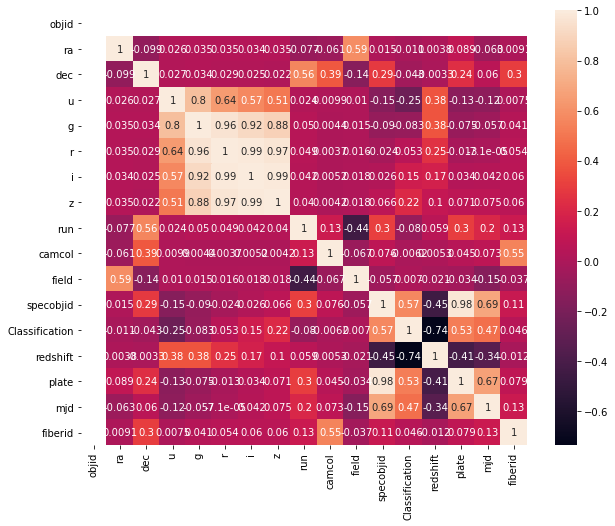

In [127]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,vmax=1)
plt.show()

We drop one attributes which was constant in given dataset for seeing better correlation in heatmaap, and here we can  easily see positive and negative correlation

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17]),
 <a list of 17 Text major ticklabel objects>)

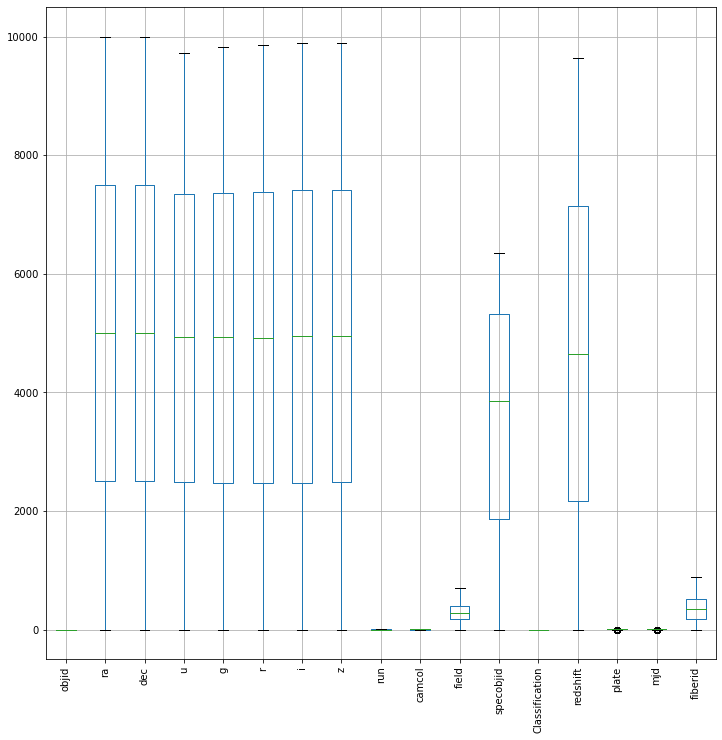

In [128]:
df.boxplot(figsize=(12,12));
plt.xticks(rotation=90)

We develope box xchart for understanding of Outliers in data

In [129]:
y = df['Classification']
x = df.drop('Classification', axis=1)
df['Classification']= df['Classification']

In [130]:
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.29,random_state=43)
y_test.shape

(2900,)

In [131]:
x_test.shape

(2900, 16)

We split data here into training and testing foor precessing the model

In [132]:
cri={'criterion':['gini', 'entropy']}
model_test= RandomForestClassifier()
grid=GridSearchCV(estimator=model_test, param_grid=cri)

In [133]:
grid.fit(x_test,y_test)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.criterion)
print(grid.best_params_)
print('/n')

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy']})
0.986551724137931
entropy
{'criterion': 'entropy'}
/n


In [134]:
smoothing={'var_smoothing':[1e-09,None]}
model_test1= GaussianNB()
grid=GridSearchCV(estimator=model_test1, param_grid=smoothing)

In [135]:
grid.fit(x_test,y_test)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.var_smoothing)
print(grid.best_params_)
print('/n')

GridSearchCV(estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, None]})
0.9165517241379308
1e-09
{'var_smoothing': 1e-09}
/n


In [136]:
neighbor={'n_neighbors':[5,1,2,8,6,10,15,20]}
model_test1= KNeighborsClassifier()
grid=GridSearchCV(estimator=model_test1, param_grid=neighbor)

In [137]:
grid.fit(x_test,y_test)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.n_neighbors)
print(grid.best_params_)
print('/n')

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 1, 2, 8, 6, 10, 15, 20]})
0.9675862068965516
5
{'n_neighbors': 5}
/n


We used GridSearchCV form using best parameter in our model

In [138]:


model=[LogisticRegression(),GaussianNB(var_smoothing=1e-09),SVC(),KNeighborsClassifier(weights='uniform',n_neighbors=20),RandomForestClassifier(criterion='gini')]


for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_train)
    print('Accuracy Score of',m,'is :')
    print(accuracy_score(y_train,predm))
    print(confusion_matrix(y_train,predm))
    print(classification_report(y_train,predm))
    print('\n')

Accuracy Score of LogisticRegression() is :
0.9266197183098591
[[3352  112   83]
 [ 215  406    1]
 [  87   23 2821]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      3547
           1       0.75      0.65      0.70       622
           2       0.97      0.96      0.97      2931

    accuracy                           0.93      7100
   macro avg       0.88      0.85      0.87      7100
weighted avg       0.92      0.93      0.93      7100



Accuracy Score of GaussianNB() is :
0.9269014084507042
[[3279  168  100]
 [  34  587    1]
 [ 216    0 2715]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      3547
           1       0.78      0.94      0.85       622
           2       0.96      0.93      0.94      2931

    accuracy                           0.93      7100
   macro avg       0.89      0.93      0.91      7100
weighted avg       0.93      0.93      0.93      7100



Accura

Here,  Random forest Classifier is giving us better result and accuracy than others

In [139]:
import joblib
joblib.dump(RandomForestClassifier(),'M20_P8_Space_Dataset.obj')

['M20_P8_Space_Dataset.obj']